# Collaboration and Competition

---

Follow the instructions below to get started! It is important to run the cells in the exact order they appear.

## 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [4]:
%load_ext autoreload
%autoreload 2

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

Firstly, the environment and the needed libraries are imported.

In [5]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


The rest of the required libraries are imported.

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [11]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from multi_agent import MultiAgent

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -7.38993645 -1.5        -0.          0.
  6.83172083  5.99607611 -0.          0.        ]


## 2. Training

### Hyper-paremeters
Below are the hyperparameters used for the training algorithm.

In [12]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 256        # minibatch size
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
LEARN_EVERY = 1         # learning timestep interval
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
OU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter, volatility
OU_THETA = 0.15         # Ornstein-Uhlenbeck noise parameter, speed of mean reversion

config = {}
config['buffer_size']  = BUFFER_SIZE
config['batch_size']   = BATCH_SIZE
config['lr_actor']     = LR_ACTOR
config['lr_critic']    = LR_CRITIC
config['weight_decay'] = WEIGHT_DECAY
config['learn_every']  = LEARN_EVERY
config['gamma']        = GAMMA
config['tau']          = TAU
config['ou_sigma']     = OU_SIGMA
config['ou_theta']     = OU_THETA

### Other pre-train actions

The instance of the agents used to solve the environment is created. Moreover, other variables and objects used are declared.

In [16]:
N_EPISODES = 5000

np.random.seed(0)
torch.manual_seed(0)


multi_agent = MultiAgent(state_size, action_size, num_agents, 0, config)

### Training pipeline

The training pipeline is written in the function below.

In [17]:
def training():
    scores_window = deque(maxlen=100)
    scores = []
    average_scores = []
    
    for i_episode in range(1, N_EPISODES+1):     
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment  
        states = env_info.vector_observations                  # get the current state (for each agent)
        score  = np.zeros(num_agents)                          # initialize the score  (for each agent)
        
        multi_agent.reset()

        while True:
            actions = multi_agent.act(states)
            
            env_info = env.step(actions)[brain_name]  
            
            next_states = env_info.vector_observations
            rewards = env_info.rewards         
            dones = env_info.local_done
            
            multi_agent.step(states, actions, rewards, next_states, dones)   
            
            states = next_states
            score += rewards  

            if any(dones):  
                break
                
        score_max = np.max(score)
        scores.append(score_max)
        scores_window.append(score_max)
        average_score = np.mean(scores_window)
        average_scores.append(average_score)

        
        if i_episode % 10 == 0:
                print('Episode {}, total score (averaged over agents): {:.3f}'.format(i_episode, np.mean(scores_window)))

        if average_score >= 0.5:
                multi_agent.save_weights()
                print("Solved in episode: {}, average score: {:.3f}".format(i_episode , average_score))
                break
    
    
    return scores , average_scores

### 3. Main function

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

Episode 10, total score (averaged over agents): 0.000
Episode 20, total score (averaged over agents): 0.000
Episode 30, total score (averaged over agents): 0.000
Episode 40, total score (averaged over agents): 0.007
Episode 50, total score (averaged over agents): 0.014
Episode 60, total score (averaged over agents): 0.020
Episode 70, total score (averaged over agents): 0.018
Episode 80, total score (averaged over agents): 0.016
Episode 90, total score (averaged over agents): 0.014
Episode 100, total score (averaged over agents): 0.013
Episode 110, total score (averaged over agents): 0.013
Episode 120, total score (averaged over agents): 0.013
Episode 130, total score (averaged over agents): 0.013
Episode 140, total score (averaged over agents): 0.010
Episode 150, total score (averaged over agents): 0.006
Episode 160, total score (averaged over agents): 0.001
Episode 170, total score (averaged over agents): 0.000
Episode 180, total score (averaged over agents): 0.000
Episode 190, total 

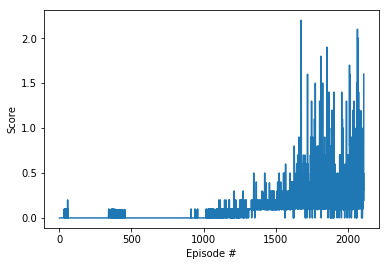

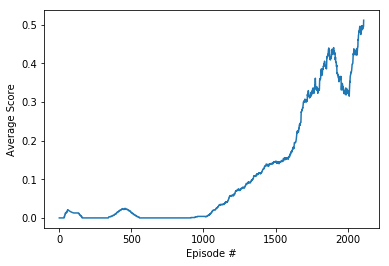

In [18]:
if __name__ == '__main__':
    scores , average_scores = training()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(average_scores)+1), average_scores)
    plt.ylabel('Average Score')
    plt.xlabel('Episode #')
    plt.show()
    
     
    
    

When finished, you can close the environment.

In [45]:
env.close()

### 4. Play time

In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine!